In [1]:
import sys, os, json
sys.path.append(r'C:\Users\pierr\Desktop\Polimi\delay_mdp\dmdp\notebooks')
from matplotlib import pyplot as plt
import loaders as load
import numpy as np
import pandas as pd
import torch

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.rc('axes', titlesize='x-large')
plt.rc('axes', labelsize='x-large')

def load_reward(path):
    files_name = os.listdir(path)
    files_name.remove('model_parameters.txt')
    models = list(filter(lambda n: "model" in n,  files_name))
    if len(models)==1:
        load_path = os.path.join(path, 'model.pt')
    else: 
        temp = np.array([int(name.replace('model_','').replace('.pt','')) for name in iter(models)])
        load_path = os.path.join(path, 'model_'+str(max(temp))+'.pt')
        
    ckpt = torch.load(load_path)
    
    return np.array(ckpt['avg_reward']), np.array(ckpt['std_reward'])

def time_to_cv(r):
    temp = np.where(r>(-200))[0]
    if len(temp)==0:
        return len(r)
    else: 
        return temp[0]

# Plot train delay 5

In [2]:
delays = [0,3,5,10,15,20]
models = ['D-TRPO','M-TRPO','L2-TRPO','E-TRPO','SARSA (0.9)','DSARSA (0.9)','TRPO']

# L2-TRPO Big Delays
l2trpo_5ext_avg, l2trpo_5ext_std = load.stats_train(method='l2trpo', source='Results', test_type='Delay5-BIG', epoch=1000)

avg = {}; std = {}

for m in models:
    for d in delays:
        avg[m] = {}; std[m] = {}
        for d in delays: 
            if m in ['SARSA (0.9)', 'DSARSA (0.9)']:
                epoch = 0
            else:
                epoch = 2000
            if m in['E-TRPO','TRPO']:
                source = 'Augmented'
            elif m=='M-TRPO':
                source = 'Memoryless'
            elif m=='L2-TRPO':
                source = 'Results-BIG'
            else:
                source = 'Results'
            temp_m = m.lower().replace('m-','').replace('e-','').replace('-','').replace(' (0.9)','')
            d_temp = d
            if m=='TRPO':
                d_temp = 0
            try:
                a, b = load.stats_train(method=temp_m, source=source, test_type='Delay'+str(d_temp), epoch=epoch)
                avg[m][d] = a; std[m][d] = b
            except:
                pass


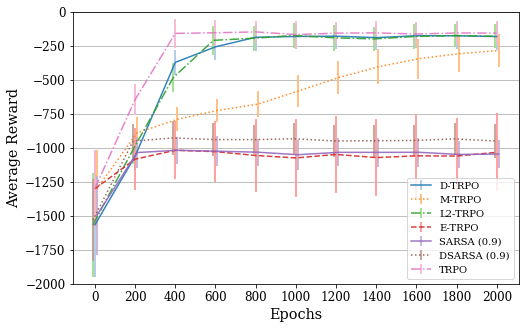

In [3]:
# Plot Range Settings
delay = 5
epoch = 2000
epochs_label = [epoch/10*i for i in range(11)]
epochs = np.array(epochs_label,dtype=int)
epochs[-1] = epoch-1

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
fig.patch.set_facecolor('white')


TABLE_COLOR = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(TABLE_COLOR)):
        r, g, b = TABLE_COLOR[i]
        TABLE_COLOR[i] = (r / 255., g / 255., b / 255.)
        
TILT = [0,10,-10]
LINE_STYLES = ['-',':','-.','--']
# Plot Data
for m_i, m in enumerate(models):
    ax.errorbar(epochs+TILT[m_i%3], avg[m][delay][epochs], yerr=std[m][delay][epochs], color=TABLE_COLOR[2*m_i], ls=LINE_STYLES[m_i%4],
                alpha=0.9, linewidth=1.5, ecolor=TABLE_COLOR[2*m_i+1], elinewidth=2, capsize=0, label=m)
    
    
# Plot Decoration Settings
ax.legend(fontsize='medium')
ax.yaxis.grid(True)
ax.set_ylim(-2000, 0)
ax.set_xticks(epochs_label)
# ax.set_title('Comparison on 5-Steps Delay')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./plots/paper/Delays_ALL_5_Paper.png', dpi=1000)

# Plot test different delays inverted pendulum

In [4]:
delays = [3,5,10,15]
models = ['D-TRPO','M-TRPO','L2-TRPO','E-TRPO','SARSA (0.9)','DSARSA (0.9)']

avg = {}; std = {}

for m in models:
    for d in delays:
        avg[m] = {}; std[m] = {}
        for d in delays: 
            if m in ['SARSA (0.9)', 'DSARSA (0.9)','E-TRPO','M-TRPO']:
                epoch = None
            else:
                epoch = 2000
            if m in['E-TRPO','TRPO']:
                source = 'Augmented'
            elif m=='M-TRPO':
                source = 'Memoryless'
            elif m=='L2-TRPO':
                source = 'Results-BIG'
            else:
                source = 'Results'
            temp_m = m.lower().replace('m-','').replace('e-','').replace('-','').replace(' (0.9)','')
            d_temp = d
            if m=='TRPO':
                d_temp = 0
            try:
                a, b = load.stats_test(method=temp_m, source=source, test_type='Delay'+str(d_temp), epoch=epoch)
                avg[m][d] = a; std[m][d] = b
            except:
                pass


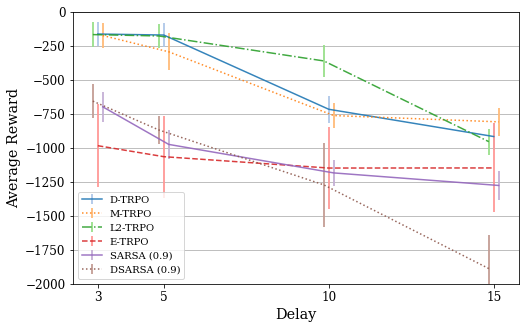

In [42]:
# Plot Range Settings
delay = 5
epoch = 2000


# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
fig.patch.set_facecolor('white')


TABLE_COLOR = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(TABLE_COLOR)):
        r, g, b = TABLE_COLOR[i]
        TABLE_COLOR[i] = (r / 255., g / 255., b / 255.)
        
TILT = [0,0.15,-0.15]
LINE_STYLES = ['-',':','-.','--']
# Plot Data
for m_i, m in enumerate(models):
    y = [avg[m][d] for d in delays]
    yerr = [std[m][d] for d in delays]
    ax.errorbar([d+TILT[m_i%3] for d in delays], y, yerr=yerr, color=TABLE_COLOR[2*m_i], ls=LINE_STYLES[m_i%4],
                alpha=0.9, linewidth=1.5, ecolor=TABLE_COLOR[2*m_i+1], elinewidth=2, capsize=0, label=m)
    
    
# Plot Decoration Settings
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(delays)
# ax.set_title('Comparison on tst')
ax.set_xlabel('Delay')
ax.yaxis.grid(True)
ax.set_ylabel('Average Reward')
fig.savefig('./plots/paper/Tests_ALL.png', dpi=1000)

# Plot train delay 5 walker2d

In [5]:
delays = [5]
models = ['D-TRPO (32)','M-TRPO','L2-TRPO','E-TRPO','','D-TRPO (16)','TRPO']
cdir = r'C:\Users\pierr\Desktop\Polimi\delay_mdp\dmdp\output\tests_new_env'
env = 'Walker2d_v2'

avg = {}; std = {}

for m in models:
    for d in delays:
        avg[m] = {}; std[m] = {}
        for d in delays: 
            if m=='D-TRPO (32)':
                model_path = os.path.join('dtrpo_delay_5','hd_32')
            if m=='D-TRPO (16)':
                model_path = os.path.join('dtrpo_delay_5','hd_16')
            elif m=='E-TRPO':
                model_path = 'trpo_delay_5'
            elif m=='M-TRPO':
                model_path = 'mtrpo_delay_5'
            elif m=='L2-TRPO':
                model_path = 'l2trpo_delay_5'
            elif m=='TRPO':
                model_path = 'trpo_delay_0'

            temp_path = os.path.join(cdir,env,model_path)
            r_avg = []
            r_std = []
            for i in os.listdir(temp_path):
                try:
                    a, b = load_reward(os.path.join(temp_path,i))
                    r_avg.append(a.reshape(-1,1)); r_std.append(b.reshape(-1,1))
                except:
                    pass
            avg[m][d] = np.concatenate(r_avg,axis=1).mean(axis=1)
            std[m][d] = np.concatenate(r_std,axis=1).mean(axis=1)





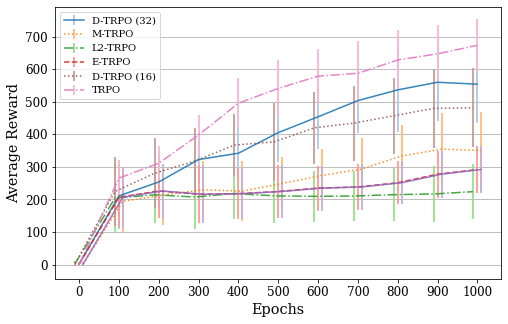

In [6]:
# Plot Range Settings
delay = 5
epoch = 1000
epochs_label = [epoch/10*i for i in range(11)]
epochs = np.array(epochs_label,dtype=int)
epochs[-1] = epoch-1

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
fig.patch.set_facecolor('white')


TABLE_COLOR = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(TABLE_COLOR)):
        r, g, b = TABLE_COLOR[i]
        TABLE_COLOR[i] = (r / 255., g / 255., b / 255.)
    
TILT = [0,10,-10]
LINE_STYLES = ['-',':','-.','--']
# Plot Data
for m_i, m in enumerate(models):
    ax.errorbar(epochs+TILT[m_i%3], avg[m][delay][epochs], yerr=std[m][delay][epochs], color=TABLE_COLOR[2*m_i], ls=LINE_STYLES[m_i%4],
                alpha=0.9, linewidth=1.5, ecolor=TABLE_COLOR[2*m_i+1], elinewidth=2, capsize=0, label=m)
    
    
    
    
# Plot Decoration Settings
ax.legend(fontsize='medium')
ax.yaxis.grid(True)
# ax.set_ylim(-2000, 0)
ax.set_xticks(epochs_label)
# ax.set_title('Comparison on 5-Steps Delay')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./plots/paper/delay_5_walker_2d.png', dpi=1000)

# Plot noises

In [7]:

epoch = 1000


noises = ['Beta', 'Triangular', 'Uniform', 'UShaped', 'Quadratic', 'LogNormal']
noises_names = ['Beta(8,2)', 'Triangular', 'Uniform', 'Beta(0.5,0.5)', 'Beta(2,2)', 'LogNormal']

# L2 TRPO Noises
l2trpo_avg = {}; l2trpo_std = {}
for n in noises:
    if n=='no_noise':
        a, b = load.stats_train(method='l2trpo', source='Results', test_type='Delay5', epoch=epoch)
    else:
        a, b = load.stats_train(method='l2trpo', source='Noises', test_type='Delay5-'+n, epoch=epoch)
    l2trpo_avg[n] = a; l2trpo_std[n] = b
    
    
# DTRPO HiddenDim=8
dtrpo_avg = {}; dtrpo_std = {}
for n in noises:
    if n=='no_noise':
        a, b = load.stats_train(method='dtrpo', source='Results', test_type='Delay5', epoch=epoch)
    else:
        a, b = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-'+n, epoch=epoch)
    dtrpo_avg[n] = a; dtrpo_std[n] = b




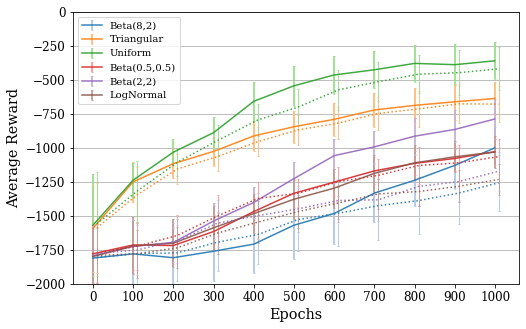

In [8]:
# Plot Range Settings
delay = 5
epoch = 1000
epochs_label = [epoch/10*i for i in range(11)]
epochs = np.array(epochs_label)
epochs[-1] = epoch-1

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
fig.patch.set_facecolor('white')



TABLE_COLOR = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(TABLE_COLOR)):
        r, g, b = TABLE_COLOR[i]
        TABLE_COLOR[i] = (r / 255., g / 255., b / 255.)
        
LINE_STYLES = ['-',':','-.','--']
TILT = [0,10,-10]
# Plot Data
for n_i, n in enumerate(noises):
    ax.errorbar(epochs, dtrpo_avg[n][epochs], yerr=dtrpo_std[n][epochs], color=TABLE_COLOR[2*n_i], ls=LINE_STYLES[0],
                alpha=0.9, linewidth=1.5, ecolor=TABLE_COLOR[2*n_i+1], elinewidth=2, capsize=1, label=noises_names[n_i])

for n_i, n in enumerate(noises):
    ax.errorbar(epochs+TILT[1], l2trpo_avg[n][epochs], yerr=l2trpo_std[n][epochs], color=TABLE_COLOR[2*n_i], ls=LINE_STYLES[1],
                alpha=0.9, linewidth=1.5, ecolor=TABLE_COLOR[2*n_i+1], elinewidth=1, capsize=1)
    
    


# Plot Decoration Settings
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.yaxis.grid(True)
ax.set_xticks(epochs_label)
# ax.set_title('Comparison on 5-Steps Delay')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./plots/paper/Noises_DTRPO.png', dpi=1000)
